The distribution of malware is ever-changing. Not only are new samples released, but new
types of viruses as well. For example, cryptojackers are a relatively recent breed of malware
unknown until the advent of cryptocurrency. Interestingly, from a machine learning
perspective, it's not only the types and distribution of malware that are evolving, but also
their definitions, something known as concept drift. To be more specific, a 15 year-old virus
is likely no longer executable in the systems currently in use. Consequently, it cannot harm
a user, and is therefore no longer an instance of malware.
By tracking the drift of malware, and even predicting it, an organization is better able to
channel its resources to the correct type of defense, inoculating itself from future threats.

lets say this is the data

In [2]:
month0 = {"Trojan": 24, "CryptoMiner": 11, "Other": 36, "Worm": 29}
month1 = {"Trojan": 28, "CryptoMiner": 25, "Other": 22, "Worm": 25}
month2 = {"Trojan": 18, "CryptoMiner": 36, "Other": 41, "Worm": 5}
month3 = {"CryptoMiner": 18, "Trojan": 33, "Other": 44, "Worm": 5}
months = [month0, month1, month2, month3]

convert the data into seperate time series for each class of malware

In [3]:
trojan_time_series = []
crypto_miner_time_series = []
worm_time_series = []
other_time_series = []
for month in months:
    trojan_time_series.append(month['Trojan'])
    crypto_miner_time_series.append(month["CryptoMiner"])
    worm_time_series.append(month["Worm"])
    other_time_series.append(month["Other"])

In [16]:
trojan_time_series

[24, 28, 18, 33]

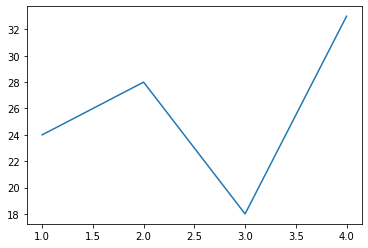

In [15]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4], trojan_time_series)
plt.show()

import the moving average from statsmodels

In [5]:
from statsmodels.tsa.arima_model import ARMA

# predict the follinwg month distribution based on the time series using moving average
ts_model = ARMA(trojan_time_series, order=(0,1))
model_fit_to_data = ts_model.fit(disp=True)
y_Trojan = model_fit_to_data.predict(len(trojan_time_series), len(trojan_time_series))


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [6]:
print(len(trojan_time_series))

4


In [7]:
print("Trojan prediction for following month: " + str(y_Trojan[0]))

Trojan prediction for following month: 21.700000098458403


In [8]:
def arma_predict(input_time_series, order_tuple=(0,1)):
    ts_model = ARMA(input_time_series, order=order_tuple)
    model_fit_to_data = ts_model.fit(disp=True)
    y_Model = model_fit_to_data.predict(
        len(input_time_series), len(input_time_series)
    )
    
    print("prediction: ", str(y_Model[0]))

In [9]:
arma_predict(crypto_miner_time_series)

prediction:  24.099999731485152


In [10]:
arma_predict(worm_time_series)

prediction:  14.666667419589228


In [11]:
arma_predict(other_time_series)

prediction:  27.40000158615626
